### **importing necessary libraries**

In [72]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading the IOT Sensored Data

In [73]:
#Loading our IOT sensored data
df=pd.read_csv('Irrigation Scheduling.csv')
df

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24
...,...,...,...,...,...,...,...,...,...,...
4683,4684,29.34,9921.75,-17.49,327,1,0,Dry,08-10-2022,22:06:24
4684,4685,29.31,9921.45,-17.52,328,1,0,Dry,08-10-2022,22:06:24
4685,4686,29.29,9921.48,-17.51,328,1,0,Dry,08-10-2022,22:06:24
4686,4687,29.26,9921.51,-17.51,327,1,0,Dry,08-10-2022,22:06:24


In [74]:
#Checking the class column
df['class']

0       Very Dry
1       Very Dry
2       Very Dry
3       Very Dry
4       Very Dry
          ...   
4683         Dry
4684         Dry
4685         Dry
4686         Dry
4687         Dry
Name: class, Length: 4688, dtype: object

#### **Describing the data**

In [75]:
#describe() method returns description of the data in the DataFrame.
df.describe()

,id,temperature,pressure,altitude,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4682.000000,4688.000000,4688.000000,4688.000000
mean,2344.500000,29.599089,9963.153215,-14.291506,243.692406,1.878413,0.703712
std,1353.453361,5.842685,1383.602527,2.649815,76.176855,1.152977,0.456668
min,1.000000,27.970000,-2120.400000,-17.610000,-243.000000,0.000000,0.000000
25%,1172.750000,28.630000,9935.255000,-16.340000,171.000000,1.000000,0.000000
50%,2344.500000,29.180000,9969.535000,-13.470000,233.000000,2.000000,1.000000
75%,3516.250000,29.990000,9975.700000,-12.950000,326.000000,3.000000,1.000000
max,4688.000000,178.700000,99931.100000,116.700000,480.000000,3.000000,1.000000


In [76]:
#Checking the shape of sensored data
df.shape

(4688, 10)

In [77]:
#To display number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4688 non-null   int64  
 1   temperature   4688 non-null   float64
 2   pressure      4688 non-null   float64
 3   altitude      4682 non-null   float64
 4   soilmiosture  4688 non-null   int64  
 5   note          4688 non-null   int64  
 6   status        4688 non-null   int64  
 7   class         4688 non-null   object 
 8   date          4688 non-null   object 
 9   time          4688 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 366.4+ KB


In [78]:
type(df)

pandas.core.frame.DataFrame

In [79]:
#Checking the data types of each column
df.dtypes

id                int64
temperature     float64
pressure        float64
altitude        float64
soilmiosture      int64
note              int64
status            int64
class            object
date             object
time             object
dtype: object

In [80]:
#Checking the number of unique entries in every column
df.nunique()

id              4688
temperature      426
pressure        2593
altitude         555
soilmiosture     262
note               4
status             2
class              4
date               1
time               1
dtype: int64

## **Data Wrangling**

In [81]:
#Dropping the id column
df.drop("id",axis=1,inplace=True)

In [82]:
#Checking whether the column has been removed or not
df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24


In [83]:
#Checking for nulls
df.isna().sum()

temperature     0
pressure        0
altitude        6
soilmiosture    0
note            0
status          0
class           0
date            0
time            0
dtype: int64

In [84]:
#Filling missing entries in altitude column with the mean of all altitude
df['altitude'].fillna(int(df['altitude'].mean()),inplace=True)

In [85]:
#Verifying filled entries
df['altitude'].isna().sum()

0

In [86]:
#Checking uniques in class column
df['class'].value_counts()

class
Very Wet    1842
Wet         1457
Very Dry    1023
Dry          366
Name: count, dtype: int64

In [87]:
#Another method
df.groupby('class').size()

class
Dry          366
Very Dry    1023
Very Wet    1842
Wet         1457
dtype: int64

## **Exploratory Data Analysis**

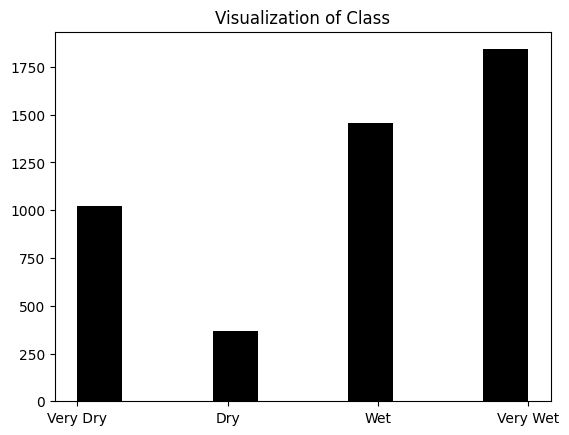

In [88]:
#Visualizing the class column as a histogram

plt.hist(df['class'], color="black")
plt.title("Visualization of Class")
plt.show()


## **Encoding categorical values**

In [89]:
# Checking the class column before encoding 
df.iloc[:,6].values

array(['Very Dry', 'Very Dry', 'Very Dry', ..., 'Dry', 'Dry', 'Dry'],
      dtype=object)

In [90]:
## converting categorical column to numeric using one hot encoder before passing thriugh the models
onehot_encoder=OneHotEncoder()
df['class']=onehot_encoder.fit_transform(df[['class']]).toarray()
df['class'].values

array([0., 0., 0., ..., 1., 1., 1.])

In [91]:
# Now checking data type of column class to see if class was encoded successfully
df['class'].dtype

dtype('float64')

In [92]:
#To display first 5 rows of new data
df.head(5)

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,29.10,9984.53,-12.21,377,0,0,0.0,08-10-2022,22:06:24
1,29.08,9984.36,-12.22,379,0,0,0.0,08-10-2022,22:06:24
2,29.06,9984.56,-12.20,376,0,0,0.0,08-10-2022,22:06:24
3,29.05,9984.39,-12.22,377,0,0,0.0,08-10-2022,22:06:24
4,29.03,9984.42,-12.21,379,0,0,0.0,08-10-2022,22:06:24


# **Correlation of columns**

In [93]:
#Checking the correlation between the columns
#corr() function tells us how one column can influence the other
data=df.iloc[:,0:7].corr()
data

,temperature,pressure,altitude,soilmiosture,note,status,class
temperature,1.000000,0.069229,0.290575,-0.139279,0.034205,0.028588,-0.027064
pressure,0.069229,1.000000,0.695914,-0.054813,-0.007703,0.003589,-0.003265
altitude,0.290575,0.695914,1.000000,-0.134397,0.076287,0.087809,-0.112191
soilmiosture,-0.139279,-0.054813,-0.134397,1.000000,-0.969905,-0.894602,0.291649
note,0.034205,-0.007703,0.076287,-0.969905,1.000000,0.908939,-0.221729
status,0.028588,0.003589,0.087809,-0.894602,0.908939,1.000000,-0.448475
class,-0.027064,-0.003265,-0.112191,0.291649,-0.221729,-0.448475,1.000000


<Axes: >

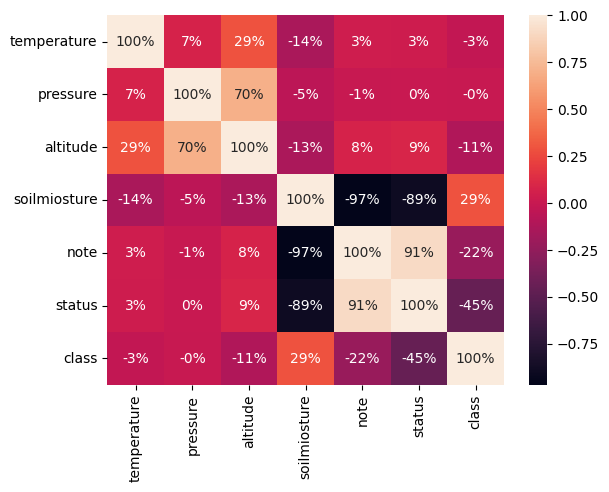

In [94]:
#Visualizing the correlation using seaborn
sns.heatmap(data,annot=True,fmt='.0%')

# **Modelling**

In [95]:
#Dividing sensored data into features and target
X=df.iloc[:,0:4].values  
Y=df.iloc[:,6].values   

In [96]:
print(X)

[[  29.1  9984.53  -12.21  377.  ]
 [  29.08 9984.36  -12.22  379.  ]
 [  29.06 9984.56  -12.2   376.  ]
 ...
 [  29.29 9921.48  -17.51  328.  ]
 [  29.26 9921.51  -17.51  327.  ]
 [  29.28 9922.2   -17.45  323.  ]]


In [97]:
print(Y)

[0. 0. 0. ... 1. 1. 1.]


In [98]:
#Splitting dataset into 80% training and 20% testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [99]:


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
X_train

array([[-1.45684277e-01,  1.22858351e-02,  7.87251455e-01,
        -1.36027109e-01],
       [-2.26787465e-01, -1.34352582e-02, -3.92021632e-01,
         1.27957479e+00],
       [ 5.29357750e-02,  4.87766487e-04,  2.47343295e-01,
        -1.00111716e+00],
       ...,
       [-2.35063301e-01,  7.54053459e-03,  5.70577785e-01,
        -9.48687457e-01],
       [-1.20856771e-01, -3.05817237e-03,  8.39500357e-02,
         1.25335994e+00],
       [ 1.65220987e-02, -3.39060414e-03,  6.61898988e-02,
        -1.04043943e+00]])

In [101]:
X_test

array([[-1.04305100e-01,  4.15103421e-03,  4.14288581e-01,
         1.64658269e+00],
       [-9.43740972e-02,  1.67409162e-03,  3.00623705e-01,
         1.16160796e+00],
       [ 1.55556135e-01, -2.68889674e-02, -1.01007439e+00,
        -1.00111716e+00],
       ...,
       [ 1.15565974e-02,  1.19173964e-03,  2.79311541e-01,
         1.18782281e+00],
       [-2.44994304e-01, -2.44576527e-02, -8.99961546e-01,
         1.05674856e+00],
       [-2.36718468e-01,  7.42320573e-03,  5.63473731e-01,
        -9.22472607e-01]])

In [102]:
Y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [103]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0.

**Model 1: Logistic Regression**

In [104]:
#Fitting the Logistic Regression model on X and Y
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [105]:
# prediction of this model 
pred1=model1.predict(X_test)

In [106]:
#Testing model accuracy on test data

accuracy_score(Y_test,pred1)

0.9093816631130064

In [107]:
# Predict probabilities for the test set
probabilities = model1.predict_proba(X_test)



# Stack probabilities and pred1 arrays horizontally
side_by_side = np.hstack((probabilities, pred1.reshape(-1, 1)))

# Print the stacked arrays
# This tells us the confidence level of the predictions made
print(side_by_side[:10])

[[0.83796554 0.16203446 0.        ]
 [0.89311879 0.10688121 0.        ]
 [0.97964343 0.02035657 0.        ]
 [0.96519447 0.03480553 0.        ]
 [0.93710599 0.06289401 0.        ]
 [0.99286706 0.00713294 0.        ]
 [0.97953836 0.02046164 0.        ]
 [0.97697721 0.02302279 0.        ]
 [0.73822233 0.26177767 0.        ]
 [0.98853933 0.01146067 0.        ]]


In [108]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred1))

[[853   0]
 [ 85   0]]


In [109]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       853
         1.0       0.00      0.00      0.00        85

    accuracy                           0.91       938
   macro avg       0.45      0.50      0.48       938
weighted avg       0.83      0.91      0.87       938



c:\Users\Emmanuel Tetteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Emmanuel Tetteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Emmanuel Tetteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

**Model 2: Gaussian Naive Bayes Classifier**

In [110]:
#Fitting the Gaussian Naive Bayes Classifier model on X and Y
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,Y_train) 

GaussianNB()

In [111]:
#prediction of this model
pred2=model2.predict(X_test)

In [112]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred2)

0.8699360341151386

In [113]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred2))

[[737 116]
 [  6  79]]


In [114]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       853
         1.0       0.41      0.93      0.56        85

    accuracy                           0.87       938
   macro avg       0.70      0.90      0.74       938
weighted avg       0.94      0.87      0.89       938



**Model 3: Support Vector Classifier**

In [115]:
from sklearn.svm import SVC
model3=SVC(kernel='linear')
model3.fit(X_train,Y_train) 

SVC(kernel='linear')

In [116]:
# prediction of this model 
pred3=model3.predict(X_test)

In [117]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred3))

0.9093816631130064


In [118]:
## using gridsearch to obtain the best hyperparameters for the SVC model

param_grid = {
    'C': [0.1,1],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)
print("Accuracy on test set:", accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy on test set: 0.9872068230277186


In [119]:
## using new hyperparameters obtained with gridsearchcv
model3_gridscv=SVC(kernel='rbf', gamma=1.0, C=1.0, probability=True)
model3_gridscv.fit(X_train,Y_train) 

SVC(gamma=1.0, probability=True)

In [120]:
##predictions
pred4 = model3_gridscv.predict(X_test)

## accuracy of our SCV with new hyperparameters
accuracy_score(Y_test, pred4)

0.9872068230277186

In [121]:
# Predict probabilities for the test set
probabilities1 = model3_gridscv.predict_proba(X_test)



# Stack probabilities and pred1 arrays horizontally
side_by_side = np.hstack((probabilities1, pred4.reshape(-1, 1)))

np.set_printoptions(suppress=True)
# Print the stacked arrays
# This tells us the confidence level of the predictions made
print(side_by_side[:10])

[[0.99999987 0.00000013 0.        ]
 [0.49363482 0.50636518 1.        ]
 [0.9999999  0.0000001  0.        ]
 [0.99999989 0.00000011 0.        ]
 [0.99999932 0.00000068 0.        ]
 [0.9999999  0.0000001  0.        ]
 [0.9999999  0.0000001  0.        ]
 [0.99862196 0.00137804 0.        ]
 [0.00000963 0.99999037 1.        ]
 [0.99999919 0.00000081 0.        ]]


In [122]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred4))

[[843  10]
 [  2  83]]


In [123]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred4))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       853
         1.0       0.89      0.98      0.93        85

    accuracy                           0.99       938
   macro avg       0.95      0.98      0.96       938
weighted avg       0.99      0.99      0.99       938

